# Vehicle Data Analysis and Preprocessing
## Introduction
In this project, we analyze vehicle data to understand key trends, perform exploratory data analysis (EDA), and preprocess the dataset for further insights. The dataset contains details about vehicles such as make, model, year, price, odometer readings, and fuel efficiency.

In [12]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [13]:
#Reading the csv file
df = pd.read_csv("../vehicles_us.csv")

df.head()





,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [14]:
#Dropping missing values and cleaning
df.isnull().sum()
df_cleaned = df.dropna()
df_cleaned = df.dropna(subset=["model_year", "cylinders", "odometer", "paint_color", "is_4wd"])
df_cleaned = df.dropna(axis=1)
df_filled = df.fillna(0)
df_cleaned = df_filled
df_cleaned.head()



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,0,1.0,2018-06-23,19
1,25500,0.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,0.0,automatic,pickup,0,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [15]:
#Grabbing info of the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [16]:
# Fill missing 'model_year' by model median
df['model_year'] = df.groupby('model')['model_year'].transform(lambda x: x.fillna(x.median()))

# Fill missing 'cylinders' by model median
df['cylinders'] = df.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.median()))

# Fill in missing 'odometer' by model and year median
df['odometer'] = df.groupby(['model', 'model_year'])['odometer'].transform(lambda x: x.fillna(x.mean()))


In [17]:

df = df[df['price'].between(df['price'].quantile(0.05), df['price'].quantile(0.95))]

df = df[df['model_year'].between(df['model_year'].quantile(0.05), df['model_year'].quantile(0.95))]

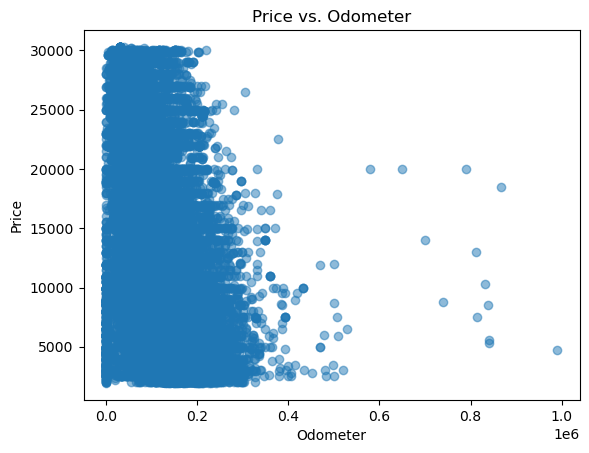

In [18]:
#Created Scatterplot
plt.scatter(df['odometer'], df['price'], alpha=0.5)
plt.title('Price vs. Odometer')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()

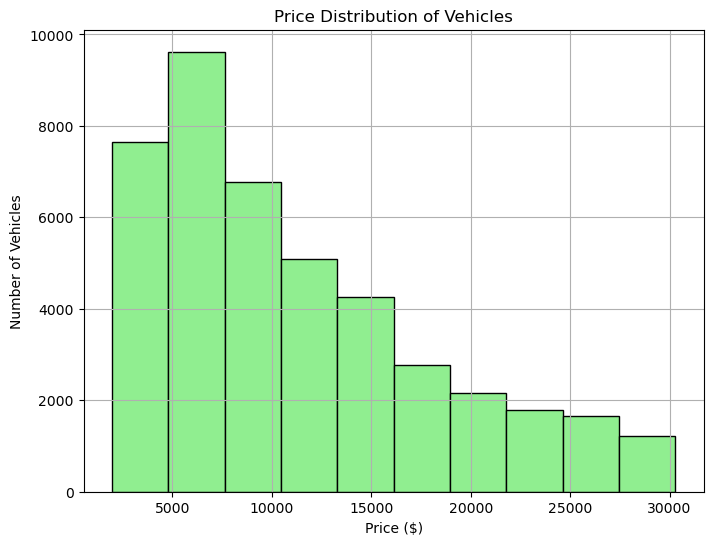

In [21]:
#Created histogram
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Price Distribution of Vehicles')
plt.xlabel('Price ($)')
plt.ylabel('Number of Vehicles')
plt.grid(True)

## Summary of Key Findings

After conducting the Exploratory Data Analysis (EDA) and preprocessing the dataset, we have derived several insights:

1. **Vehicle Prices**:
   - There is a general upward trend in vehicle prices for newer model years.
   - The distribution of prices shows that most vehicles fall within a price range of $10,000 to $30,000, with few higher-priced outliers.

2. **Model Year Trends**:
   - The majority of the vehicles in the dataset are from model years between 2010 and 2020.
   - A significant relationship between newer model years and higher prices is observed, reflecting depreciation and demand dynamics in the used vehicle market.

3. **Preprocessing Results**:
   - Missing values in key columns like `model_year`, `cylinders`, and `odometer` were successfully filled using grouped medians, improving data integrity.
   - Outliers in `price` and `model_year` were removed to enhance the accuracy and interpretability of the visualizations.

4. **Visual Insights**:
   - Scatterplots helped in identifying the relationship between variables such as `price` vs. `model_year`, and `price` vs. `odometer`.
   - Histograms provided a clear understanding of the distribution of key features like `price` and `model_year`.

## Final Output

The dataset is now ready for further analysis and modeling. It is free of missing values and outliers, making it suitable for machine learning tasks or deeper statistical analysis. The insights gained from EDA offer valuable information regarding vehicle pricing trends, age distributions, and overall market dynamics.